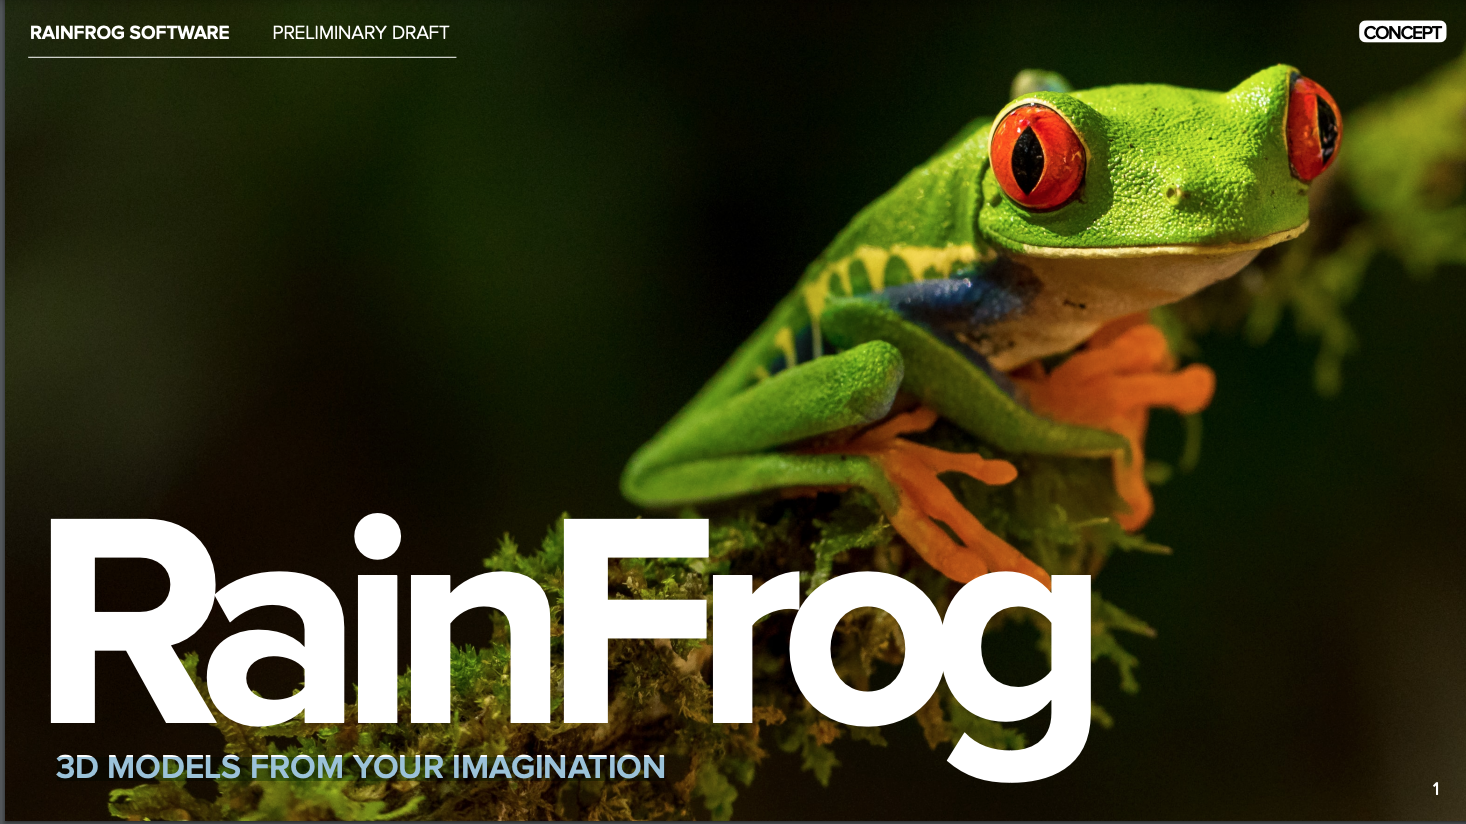

# What’s RainFrog?
RainFrog is a 3D software that takes whatever text prompt and transforms it into a 3D Model, ready to be used for Gaming, VFX, Films, VR/AR, and other.

Project Objectives of this project:
1. generation of a good 3D model with good quality
2. improvement in generation and outputs as OBJ and GLB, with JPG texture
3. deploy on server and creation of API
4. support in linking API to my app (on Bubble) and everything fully functioning

## Checking GPU

In [ ]:
! nvidia-smi

Wed Feb  1 11:41:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title Require packages
! git clone https://github.com/ashawkey/stable-dreamfusion.git

%cd stable-dreamfusion

# install requirements
! pip install -r requirements.txt
! pip install git+https://github.com/NVlabs/nvdiffrast/

### Training & Testing

In [ ]:
#@markdown ####**Training Settings:**
Prompt_text = "A Horse Standing in the sand" #@param {type: 'string'}
Training_iters = 5000 #@param {type: 'integer'}
Learning_rate = 1e-3 #@param {type: 'number'}
Training_nerf_resolution = 64  #@param {type: 'integer'}
# CUDA_ray = True #@param {type: 'boolean'}
# View_dependent_prompt = True #@param {type: 'boolean'}
# FP16 = True #@param {type: 'boolean'}
Seed = 0 #@param {type: 'integer'}
Lambda_entropy = 1e-4 #@param {type: 'number'}
Max_steps = 512 #@param {type: 'number'}
Checkpoint = 'latest' #@param {type: 'string'}

#@markdown ---

#@markdown ####**Output Settings:**
Workspace = "RainFrog" #@param{type: 'string'}
# Save_mesh = True #@param {type: 'boolean'}

# processings
Prompt_text = "'" + Prompt_text + "'"

In [ ]:
#@title Training model
import torch
torch.cuda.empty_cache()

%run main.py -O --text {Prompt_text} --workspace {Workspace} --iters {Training_iters} --lr {Learning_rate} --w {Training_nerf_resolution} --h {Training_nerf_resolution} --seed {Seed} --lambda_entropy {Lambda_entropy} --ckpt {Checkpoint} --save_mesh --max_steps {Max_steps}

Namespace(H=800, O=True, O2=False, W=800, albedo=False, albedo_iters=1000, angle_front=60, angle_overhead=30, backbone='grid', bg_radius=1.4, blob_density=10, blob_radius=0.5, bound=1, ckpt='latest', cuda_ray=True, decimate_target=100000.0, density_activation='softplus', density_thresh=0.1, dir_text=True, dt_gamma=0, eval_interval=10, fovy=60, fovy_range=[40, 70], fp16=True, gui=False, guidance='stable-diffusion', h=64, hf_key=None, iters=5000, jitter_pose=False, lambda_entropy=0.0001, lambda_opacity=0, lambda_orient=0.01, lambda_tv=1e-07, light_phi=0, light_theta=60, lr=0.001, max_ray_batch=4096, max_spp=1, max_steps=512, mcubes_resolution=256, min_lr=0.0001, min_near=0.1, negative='', num_steps=64, optim='adan', radius=3, radius_range=[1.0, 1.5], save_mesh=True, sd_version='2.1', seed=0, suppress_face=False, test=False, text='A Horse Standing in the sand', uniform_sphere_rate=0.5, update_extra_interval=16, upsample_steps=32, w=64, warm_iters=500, workspace='trial')
NeRFNetwork(
  (en

[INFO] Trainer: df | 2023-02-01_12-52-18 | cuda | fp16 | trial

[INFO] #parameters: 12240458

[INFO] Loading latest checkpoint ...

[INFO] Latest checkpoint is trial/checkpoints/df_ep0050.pth

[INFO] loaded model.

[INFO] load at epoch 50, global step 5000

[INFO] loaded optimizer.

[INFO] loaded scheduler.

[INFO] loaded scaler.

[INFO] training takes 0.0000 minutes.

In [ ]:
#@markdown ####**Testing Settings:**

Workspace_test = "RainFrog" #@param{type: 'string'}
# Save_mesh = True #@param {type: 'boolean'}

In [ ]:
#@title Testing 
%run main.py -O --test --workspace {Workspace_test} --save_mesh

Namespace(H=800, O=True, O2=False, W=800, albedo=False, albedo_iters=1000, angle_front=60, angle_overhead=30, backbone='grid', bg_radius=1.4, blob_density=10, blob_radius=0.5, bound=1, ckpt='latest', cuda_ray=True, decimate_target=100000.0, density_activation='softplus', density_thresh=0.1, dir_text=True, dt_gamma=0, eval_interval=10, fovy=60, fovy_range=[40, 70], fp16=True, gui=False, guidance='stable-diffusion', h=64, hf_key=None, iters=10000, jitter_pose=False, lambda_entropy=0.001, lambda_opacity=0, lambda_orient=0.01, lambda_tv=1e-07, light_phi=0, light_theta=60, lr=0.001, max_ray_batch=4096, max_spp=1, max_steps=1024, mcubes_resolution=256, min_lr=0.0001, min_near=0.1, negative='', num_steps=64, optim='adan', radius=3, radius_range=[1.0, 1.5], save_mesh=True, sd_version='2.1', seed=0, suppress_face=False, test=True, text=None, uniform_sphere_rate=0.5, update_extra_interval=16, upsample_steps=32, w=64, warm_iters=500, workspace='trial')
NeRFNetwork(
  (encoder): GridEncoder: input

[INFO] Trainer: df | 2023-02-01_12-52-26 | cuda | fp16 | trial

[INFO] #parameters: 12240458

[INFO] Loading latest checkpoint ...

[INFO] Latest checkpoint is trial/checkpoints/df_ep0050.pth

[INFO] loaded model.

[INFO] load at epoch 50, global step 5000

[WARN] Failed to load optimizer.

[INFO] loaded scheduler.

[INFO] loaded scaler.

==> Start Test, save results to trial/results

100% 100/100 [00:13<00:00,  8.15it/s]

==> Finished Test.

100% 100/100 [00:23<00:00,  4.24it/s]


==> Saving mesh to trial/mesh

[INFO] marching cubes thresh: 10.0 (2.1830857976391782e-14 ~ 49.73685073852539)
[INFO] mesh cleaning: (41662, 3) --> (38983, 3), (82892, 3) --> (78356, 3)
[INFO] running xatlas to unwrap UVs for mesh: v=(38983, 3) f=(78356, 3)
[INFO] writing obj mesh to trial/mesh/mesh.obj
[INFO] writing vertices (38983, 3)
[INFO] writing vertices texture coords (71799, 2)
[INFO] writing faces (78356, 3)


==> Finished saving mesh.

In [ ]:
#@title Display RGB video
import os
import glob
from IPython.display import HTML
from base64 import b64encode

def get_latest_file(path):
  dir_list = glob.glob(path)
  dir_list.sort(key=lambda x: os.path.getmtime(x))
  return dir_list[-1]

def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"

  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
rgb_video = get_latest_file(os.path.join(Workspace, 'results', '*_rgb.mp4'))
show_video(rgb_video)

## Conclusions:
- Mesh files are saved in the RainFrog Directory
- Video files are saved in the same RainFrog Directory
- Optimization is required.. 